# Настройка ноутбука

Любой исследовательский ноутбук должен начинаться с того, что мы устанавливаем необходимые пакеты для дальнейшей работы - не забывайте этого делать при создании ноутбуков для лабораторных! Делается это вот так:

In [33]:
!pip install -q numpy==1.19.0
!pip install -q matplotlib==3.3.0
!pip install -q seaborn==0.11.0
!pip install -q pandas==1.0.0

In [34]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Линейная регрессия

Это наша первая работа, в которой мы коснемся реальных (ну почти) данных! Представльте себе, что к нам пришел интересующийся человек и хочет автоматически устанавливать цены на дома! И вот чудо, у него есть данные за последнее время, которые показывают пример того, как цены были установлены! Давайте постараемся помочь с этой нелегкой задачкой!

После того, как мы на практике познакомились с линейной регрессией - самое время применить ее на реальных данных. Для разработки и оценки будем использовать инструменты библиотеки `scikit-learn` (или сокращенно `sklearn`).

[Официальный сайт](https://scikit-learn.org/stable/) и [документация по API](https://scikit-learn.org/stable/modules/classes.html) (Application Program Interface - функции библиотеки) дают огромное количество полезной информации.

# Базовый анализ данных

В базовом анализе можно отметить следующие задачи:
- загрузка данных;
- ознакомление с данными, определение смысла переменных;
- поиск и устранение пропусков в данных;
- удаление неинформативных признаков;
- преобразование признаков к числовому виду (например, текст, аудио или картинка переводятся в числовое представление).

По сути главной целью базового анализа является минимальная подготовка данных для построения базовой модели (baseline). Минимальная подготовка - все данные привести к числовому виду, так как модели могут работать только с числовыми матрицами без пропусков.

## Загрузка данных

Для построения модели будет взят набор данных Boston House-Price, который представляет собой информацию о домах в Бостоне. Данный набор поставляется вместе с фреймворком `scikit-learn` и загружается следующим образом. Информацию о нем можно найти на официальном сайте https://scikit-learn.org/stable/datasets/index.html#boston-dataset.

In [35]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


Переменная `boston_data` является типом (`Bunch`), похожим на тип `dict`, который хранит данные под ключами. В описании можно найти следующие важные ключи:
- `DESCR` - описание набора данных;
- `data` - данные (признаки) в формате матрицы 2D с размерностью [кол-во примеров, кол-во признаков];
- `feature_names` - названия признаков;
- `target` - значения целевой переменной для предсказания в формате вектора 1D по кол-ву примеров.

> Описание на сайте дает много дополнительной информации, но полученные ключи уже предоставляют необходимую информацию, так как `sklearn` хранит данные в собственном формате. После того, как будут получены данные, лучшей практикой является провести самостоятельный анализ для исключения возможных ошибок в описании.


Начнем с получения описания набора данных.

In [36]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Описание в загруженных данных во многом повторяет описание с сайта, но наиболее важными данными являются описания признаков в данных. 

> Одной из важных особенностей работы с данными является их "понимание". Без понимания признаков и целевой переменной анализ данных теряет возможность применения некоторых методик, которые позволяют обработать данные.

В данном датасете мы видим различные признаки, которые так или иначе описывают жилье. Всего заявлено 13 признаков (независимых переменных). Целевая переменная является медианным значение стоимости жилья.

Проверим размерности матрицы признаков и вектора предсказываемых значений. Так как они имеет тип `ndarray` (массив фреймворка `numpy`), то мы можем воспользоваться членом класса `.shape`, который является кортежем с элементами в виде размерности массива. Также, проверим тип данных через встроенную функцию Python - `type()`.

In [37]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']

print(type(feature_data))
print(type(target_data))

print(feature_data.shape)
print(target_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


Отлично, размерности и тип соответствуют описанию. Теперь посмотрим, что содержит последний ключ.

In [38]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Названия признаков соответсвуют описанию.

Для дальнейшей работы с данными рекомендуется перевести данные в формат фреймворка `pandas`, так как данные имеют матричный формат и работа в данном фреймворке позволит удобно организовать анализ.

In [39]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Для дальнейшего анализа включим значения целевых переменных в `DataFrame` под собственным именем.

In [40]:
df['PRICE'] = target_data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Знакомство с данными

В ходе предобработки данных делается подготовка данных для дальнейшего использования модели. Наиболее частые причины подготовки табличных данных следующие:
- Пропуски данных в некоторых колонках (признаках)
- Очистка от выбросов в данных
- Исправление распределений, отличных от нормальных

Выведем базовую информацию по данным. С помощью методов `info()` и `describe()`.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Определение наличия пропусков

Из результатов метода `info()` видно, что данные не имеют пропусков (количество non-null равно количеству записей в каждом признаке) - это важно, так как не требуется дополнять данные или исключать записи.

## Проверка наличия дубликатов

Одним из важных этапов является проверка данных на наличие одинаковых строк (записей). Поэчему это важно? Ответ прост! При разделении данные на обучение/тест или других делениях дубликаты могут попасть как в одну кучу, так и в другую. Таким образом происходит leak информации, то есть модель обучается на данных, которые есть в тесте. Это очень плохо и такое надо всегда исключать! Проверим наши:

In [43]:
# Данный метод возвращает маску дубликатов
#   Если запись - дубликат, то в маске она будет True
# Получить DataFrame без дубликатов можно утем применения инвертированной маски
dup_mask = df.duplicated()

# А мы просто посмотрим сумму элементов и так убедимся, что дубликатов нет!
dup_mask.sum()

0

## Проверка и определение типов признаков

Помимо базовых функций также важно выделить разделение на типы признаков. Выделяют следующие основные типы признаков:
- Категориальные:
    - Номинальные - значения признаков ограничены группой возможных значений (красный/синий/зеленый);
    - Бинарные - те же номинальные, но всего две группы (Да/Нет, Правда/Ложь);
    - Последовательные - те же номинальные, но еще группы имеют порядок (плохой/хороший/отличный);
- Численные - вещественные или целочисленные данные.

Метод `df.info()` показал, что данные не имеют строк, которые сразу принимаются за категориальные признаки. На данный момент все признаки являются числовыми.

In [44]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

Признак `CHAS` имеет всего два значения - проверим, какие это значения:

In [45]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

В данном случае можно рассматривать этот признак как категориальный, который не требует предобработки, так как он уже представлен числом.

Тем не менее обновим тип, чтобы в информации он был представлен верно:

In [46]:
# Сначала приведем к int, чтобы вместо 0.0 и 1.0 были значения 0 и 1
# Затем приведем к типу категорий
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


Остальные данные также можно привести к целочисленным, если они имеют только целочисленные значения, но делать это не обязательно.



Аналогично признак `RAD` имеет всего 9 значений, при этом по определению признака он является индексом, что может допускать в будущем и другие значения данного признака - так как нет явного ограничения, будем считать данный признак численным.

> Чаще всего выделение категориальных признаков делается исходя из априорных и предметных знаний, как, например, в анкете выпадающий список с вариантами. В данном датасете все признаки допускают диапазон вещественных/целочисленных значений. По этой причине в данной работе все признаки будут рассмотрены как численные.

## Поиск и удаление неинформативных признаков

Под неинформативными понимаются признаки, которые не несут полезной информации для предсказания. Это могут быть индексы записей в базе данных, полные ФИО пользователей или уникальный идентификатор каждого щеночка в базе. По сути это признаки, которые уникальны для каждой записи, поэтому на базовом этапе они удаляются. На этапе расширенного анализа они могут служить источником новых признаков.

В данном наборе данных судя по описанию мы не имеем уникальных для каждой записи признаков, так что удаление признаков не требуется.

## Результат

По результатам базового анализа и предоработки данные были приведены к числовому виду, так что можно их использовать для обучения базовой модели.

# Расширенный анализ данных

Расширенный (или описательный) анализ данных (Explanatory Data Analysis ~ EDA) является следующим этапом после построения базовой модели. Нацелен он на расширение знаний о данных, а также увеличение предсказательной способности (точности или требуемой метрики).

В качестве этапов можно выделить:
- более подходящяя обработка пропусков в данных;
- анализ распределений данных, исправление перекосов распределений;
- масштабирование значений признаков;
- корреляционный анализ;
- поиск новых зависимостей и генерация новых признаков;
- определение выбросов в данных;
- и другие подходы.

Сами по себе подходы не обязательно применяются все и разом. Одни подходы могут как улучшить результаты работы модели, так и ухудшить, поэтому данные подходы имеют экспериментальный характер.

В данной работе мы рассмотрим некоторые из подходов.

## Анализ распределений

Анализ распределений заключается в том, чтобы просмотреть распределения численных признаков, понять их характер и необходимость коррекции смещения.

Под нормальным (Гауссовым) распределением понимается распределение следующего вида:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


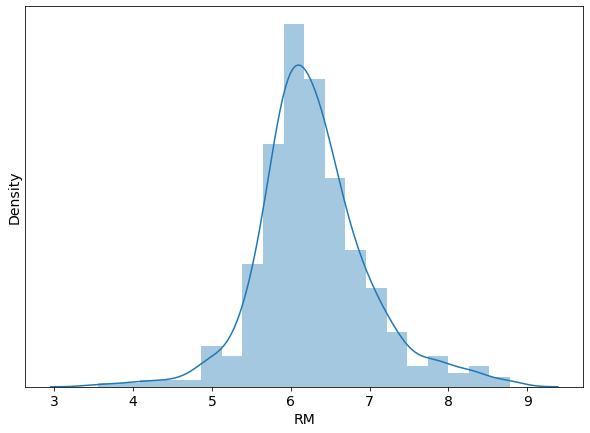

In [47]:
plt.figure(figsize=[10, 7])
sns.distplot(df['RM'], bins=20)
# Отключение меток на оси Y
plt.yticks([])
plt.show()

Смещение нормального распределения могут быть как левые (хвост находится справа), так и правое (хвост слева):

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


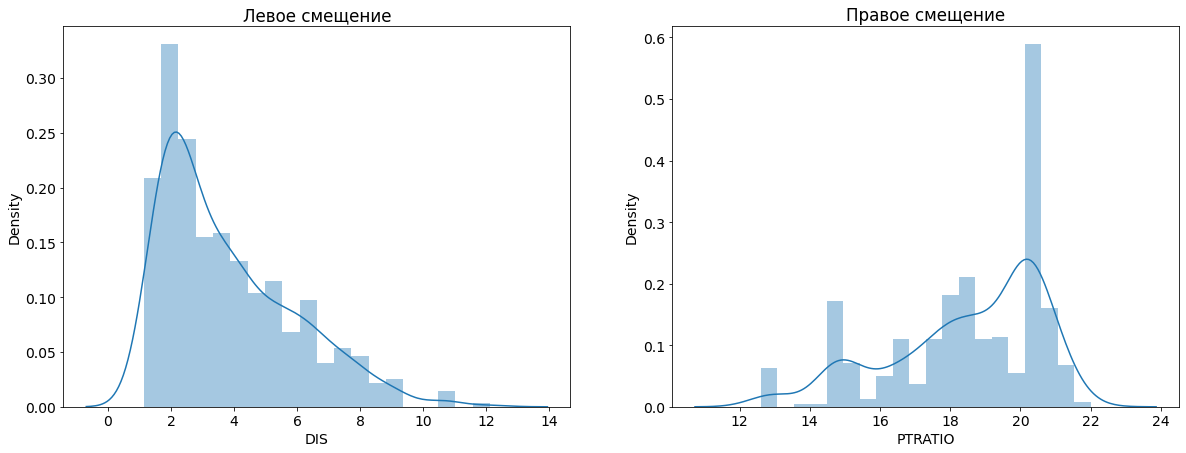

In [48]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=[20, 7])

sns.distplot(df['DIS'], ax=ax[0], bins=20)
ax[0].title.set_text('Левое смещение')

sns.distplot(df['PTRATIO'], ax=ax[1], bins=20)
ax[1].title.set_text('Правое смещение')

plt.show()

Распределения могут иметь и бимодальный характер: 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


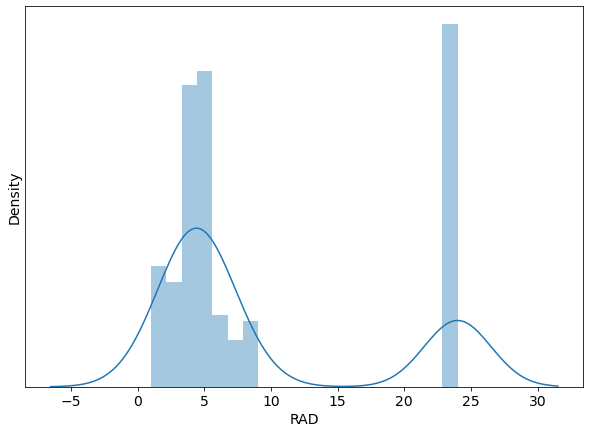

In [49]:
plt.figure(figsize=[10, 7])
sns.distplot(df['RAD'], bins=20)
# Отключение меток на оси Y
plt.yticks([])
plt.show()

Анализ распределений нужен во-первых, чтобы понять, как распределены данные по каждому признаку, и во-вторых, для понимания того, какие распределения требуют коррекции. Модель линейной регрессии чувствительна к тому, как данные распределены, поэтому коррекция смещения может помочь увеличить показатели работы модели. 

> Для этого `sklearn` имеет метод степенной коррекции `sklearn.preprocessing.PowerTransformer` и метод коррекции квантилями `sklearn.preprocessing.QuantileTransformer`.

## Корреляционный анализ

Корреляционный анализ важен для оценки того, как данные взаимосвязаны. В этом поможет функция отображения коэффициентов корреляции `DataFrame.corr()`. Корреляционный анализ позволит понять, какие переменные имеют связь с целевой переменной, что полезно для выбора признаков для обучения.


In [50]:
# Для примера выберем следующие признаки
features = ['CRIM', 'NOX', 'RM', 'PRICE']

correlation_mtrx = df[features].corr()
correlation_mtrx

,CRIM,NOX,RM,PRICE
CRIM,1.000000,0.420972,-0.219247,-0.388305
NOX,0.420972,1.000000,-0.302188,-0.427321
RM,-0.219247,-0.302188,1.000000,0.695360
PRICE,-0.388305,-0.427321,0.695360,1.000000


При этом отображение численных значений часто сложно для восприятия, поэтому проще отобразить данные в виде представления тепловой карты с помощью функции `heatmap()`.

<AxesSubplot:>

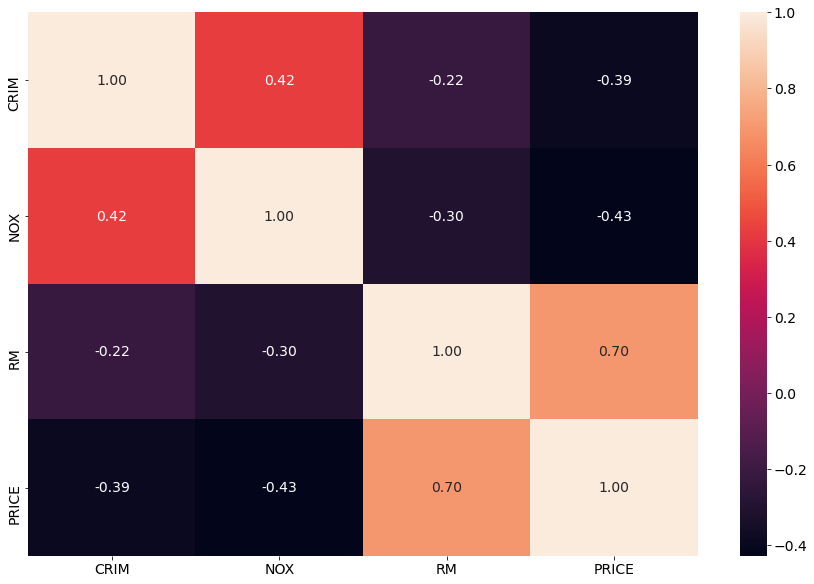

In [51]:
# Два дополнительных аргумента добавляют числа на график и указывают формат вывода данных
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

Корреляционный анализ несет следующую полезную информацию - из выбранных признаков `RM` с целевой переменной `PRICE`, так как значение по модулю "достаточно высокое" (приблизительно больше 0.6).


### Визуальная оценка

После определения признаков, которые имеют высокую корреляцию, важно также посмотреть на распределение данных, так как показатель корреляции не сообщает о характере зависимости или о том, как данные распределены:

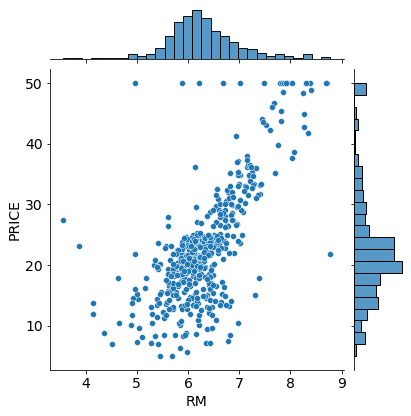

In [52]:
sns.jointplot(x="RM", y="PRICE", data=df)

Как видно на графике, данные действительно имеют корреляцию: признак `RM` соответствует линейной зависимости.

> Сама по себе визуальная оценка взаимосвязи данных очень важна, так как по ней можно определить наличие зависимостей, при том, что показатель корреляции ориентируется лишь на линейную зависимость.

## Обработка выборосов данных

По ранее представленному графику важно отметить аномальное распределение точек по линии `PRICE = 50`, что говорит о возможных выбросах в данных. Такое же поведение видно и в графике распределения данных признака `PRICE`, что выражается в небольшой правой моде.

Для оценки количества возможных выбросов выберем данные, которые соответсвуют `PRICE = 50`.

In [53]:
outliers_count = df[df['PRICE'] == 50].shape[0]

print(outliers_count)
print(outliers_count/df.shape[0]*100)

16
3.1620553359683794


Оценка количества возможных выбросов (16 записей) показывает, что они составляют около трех процентов от всего количества данных, что не скажется на дальнейшей работе при их **исключении** из данных.

## Результат

По примерам методов анализа уже видно, что данные имеют стороны, которые можно постараться скорректировать, что может положительно сказаться на показателях работы модели.

# Разработка и оценка модели

## Разделение данных

Перед тем, как переходить к модели, требуется сделать разделение обраотанных данных на выборки для обучения и тестирования. Для этого воспользуется функцией `train_test_split()`.

> В ходе работы с данными важно сохранять свойство повторяемости. Для этого в функциях, использующих случайные генераторы, нужно использовать зафиксированное состояние генератора случайных чисел.

In [54]:
from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


## Применение классов моделей

После того, как данные подготовлены, настало время создания модели, обучения и проверки.

Начнем с создания модели линейной регрессии и ее обучения с помощью метода `fit()`.

In [55]:
from sklearn.linear_model import LinearRegression

# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Для случая линейной регрессии обученная модель имеет веса для каждого признака. Объект класса `LinearRegression` позволяет получить эти веса и смещение путем обращения к атрибутам `.coef_` (веса признаков) и `.intercept_` (константное смещение, нулевой коэффициент). С аттрибутами класса модели линейной регрессии можно ознакомиться в справке здесь или на сайте https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

In [56]:
# Для отображения весов создадим функцию
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632


Каждый вес соответсвует коэффициенту, на который умножается значение признака, чтобы получить конечное значение предсказания. Так как данные не нормированны, мы не можем говорить о том, что данные веса отражают степень влияния признаков.

Для начала отобразим график предсказаний и посмотрим, как распределяются на линии пресказания. Для получения предсказания модели используется метод `predict()`.

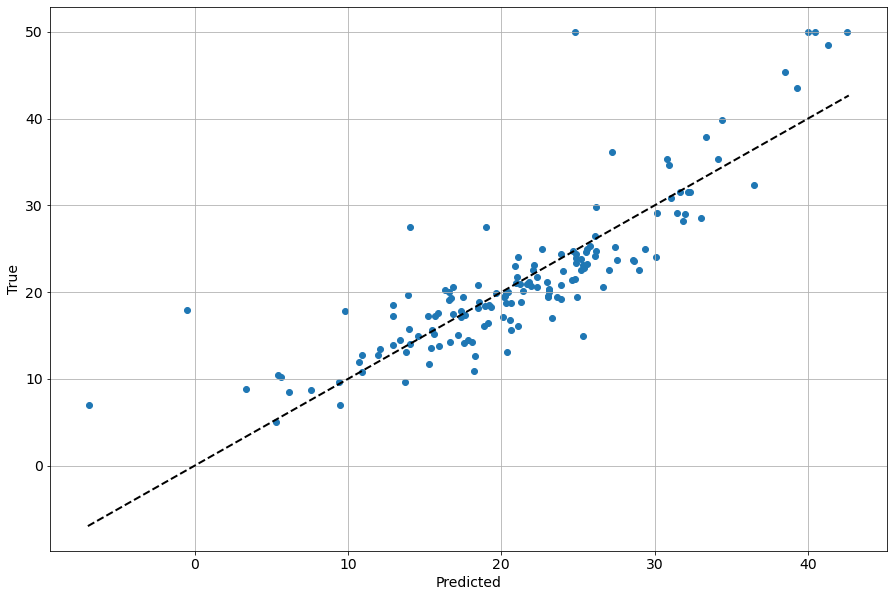

In [57]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

Прямая на графике означает точки, в которых предсказанные значения соответствуют действительным.
Как видно на графике, многие точки отклоняются от прямой, но наблюдается общая распределенность точек вокруг линии.


Помимо отображения точек предсказаний важно также оценить распределение ошибок, что может сказать о возможном смещении результатов.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


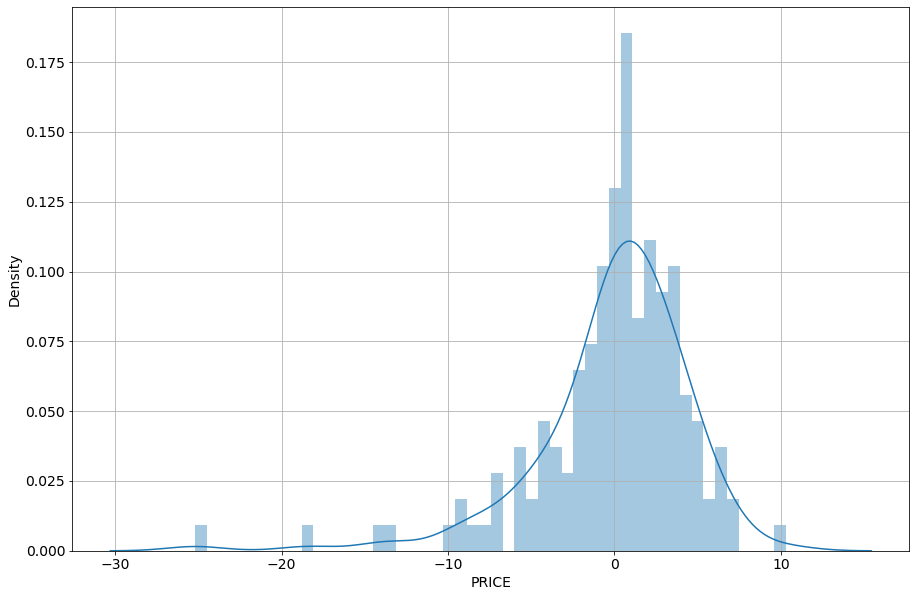

In [58]:
y_residuals = y_pred-y_test
sns.distplot(y_residuals, bins=50)
plt.grid()

Из графика распределения видно, что распределение имеет нормальный характер и центр распределения располагается возле значения 0. При этом имеются единичные отклонения, которые могут характеризоваться выбросами в данных, которые обсуждались ранее.


После представления точек предсказания важно также оценить численные характеристики. Для этого используются различные метрики. Мы воспользуемся наиболее распространенными: R2, Root Mean Squared Error (RMSE), Mean Absolute Error (MAE). 

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# При повторении кода лучшей практикой является создание функции 
#   для исключения дублирований
# Дублирование кода -> ошибки
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


По результатам обучения и оценки мы получили **baseline** модель - это модель, которая требует минимум затрат сил и времени для получения первого результата. В данном случае были поданы все данные без очистки и предобработки. Последующие эксперименты нацелены на улучшение показателей (уменьшение MSE, MAE показателей или увеличение R2). 

## Применение классов трансформации

Одной из базовых практик предобработки численных переменных является **стандартизация**. Это процесс приведения распределения к нулевому среднему и единичному стандартному отклонению.

Для стандартизации данных применим класс `StandartScaler`, который в ходе обучения определяет среднее и стандартное отклонение каждого признака и далее применяет их в ходе использования модели.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html.

При использовании стандартизации происходит определение необходимых параметров (среднее, стандартное отклонение) методом `fit()` и дальнейшая предобработка данных методом `transform()`.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955


Важно обратить внимание на порядок весов модели. Использование стандартизации делает данные более центрированными и теперь веса больше отражают влияние на результат.

In [61]:
# Отображаем средние значения и стандартные отклонения
# Количество значений соответствует количеству признаков
means = scaler.mean_
stds = scaler.var_

pairs = zip(X_test.columns, means, stds)
for pair in pairs:
    print(f'{pair[0]} | Mean: {pair[1]} | Std: {pair[2]}')

CRIM | Mean: 3.4698868644067797 | Std: 68.95769533571193
ZN | Mean: 11.403954802259888 | Std: 509.69840243863507
INDUS | Mean: 11.133050847457625 | Std: 48.00887148329024
CHAS | Mean: 0.07344632768361582 | Std: 0.06805196463340676
NOX | Mean: 0.5572593220338984 | Std: 0.013601817610839798
RM | Mean: 6.325672316384181 | Std: 0.5158032768042389
AGE | Mean: 68.7997175141243 | Std: 763.2100846659645
DIS | Mean: 3.7658740112994353 | Std: 4.507242983448881
RAD | Mean: 9.437853107344633 | Std: 74.43822815921351
TAX | Mean: 407.04237288135596 | Std: 27651.323063295986
PTRATIO | Mean: 18.277966101694915 | Std: 5.078723546873504
B | Mean: 359.70180790960455 | Std: 7534.572880912254
LSTAT | Mean: 12.421129943502825 | Std: 50.443369909668355


В результате работы с данными и применения различных методов обработки данных были получены базовые модели, описанные показателями метрик точности работы модели. На этом этапе мы кратко освоили базовые приемы, которые позволят провести исследование, предлагаемое в задании.

# Регуляризация

Помимо базового метода линейной регрессии существуют различные модификации. Одной из таких модификаций является метод Ридж (Ridge) регрессии. Основная идея Ридж регресси заключается в добавлении регуляризации по L2 норме. Функция потерь с Ридж регуляризацией выглядит следующим образом $$J=\|y-X^TW\|^2_2+\alpha*\|W\|^2_2$$

Как видно из функции потерь, минимизация происходит также с учетом величины значений весов, что и является регуляризацией. Регуляризация влияет на обучение путем удержания величины весов для исключения слишком сильного влияния признаков на работу модели, что на практике приводит к некорректным результатам.

# Задание

Требуется создать ноутбук, в котором будут проведены эксперименты с инструментами `sklearn`.

Задачи:
* Произведите базовую подготовку данных;
* Создайте baseline модель линейной регрессии;
---
* Произведите расширенный анализ данных:
    - Оцените корреляции признаков;
    - Оцените распределения признаков;
    - Оцените характер зависимости целевой переменной от каждого признака;
    - Напишите свои выводы по результатам анализа.

* Изучите работу инструментов нормализации данных:
    - Примените трансформер `sklearn.preprocessing.StandardScaler` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Примените трансформер `sklearn.preprocessing.MinMaxScaler` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Сравните результаты и сделайте выводы.

* Изучите работу инструментов выравнивания распределений:
    - Примените трансформер `sklearn.preprocessing.PowerTransformer` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Примените трансформер `sklearn.preprocessing.QuantileTransformer(output_distribution='normal')` к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
    - Сравните результаты и сделайте выводы.

* Исключите выбросы на уровне `PRICE == 50` из данных, обучите модель и оцените показатели;

* Оцените работу модели при исключении каждого признака [13 экспериментов] (результаты представить в виде таблицы `DataFrame` с указание исключенного признака и показателей метрик);

* Примените трансформер `sklearn.preprocessing.PolynomialFeatures` для генерации признака `LSTAT` в квадрате, обучите модель на данных с новым признаком, оцените работу модели;

---
* Создайте базовую модель Ридж регрессии https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html;

* Испытайте работу модели при использовании различных методов нормализации и выравнивания распределений;

* Оцените работу модели при различных $\alpha$ (изучить не менее 7 различных значений) и отобразите на графике (y-axis ~ R2, x-axis ~ log(alpha));

---
* Разработайте лучшую модель с необходимой предобработкой для решения задачи;
* Написать выводы по результатам.

> **Не забывайте разбивать ноутбук на секции, использовать функции, делать выполнение ноутбука последовательным.** 

# **Задание**

**Расширенный анализ данных**

1. Оценка корреляции признаков

<AxesSubplot:>

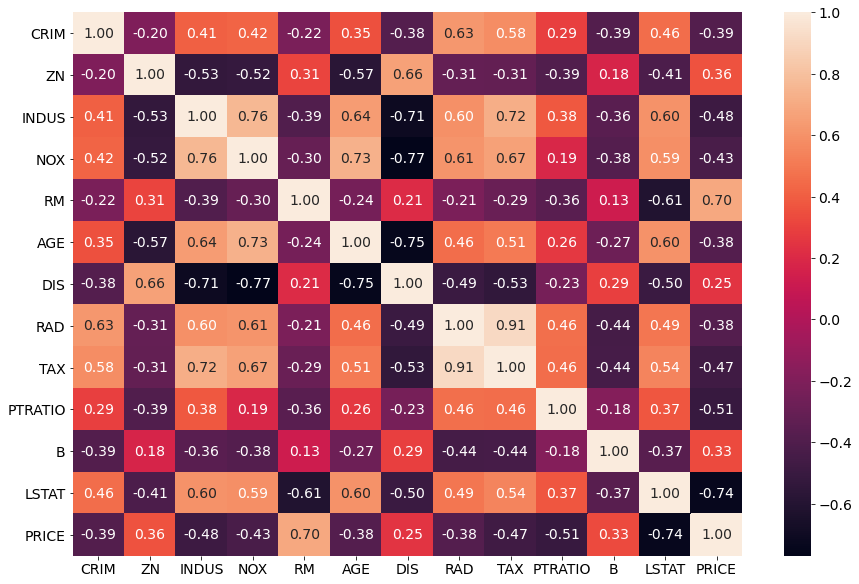

In [62]:
features = ['CRIM', 'ZN','INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']
correlation_mtrx = df[features].corr()
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

2. Оценка распределения признаков

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

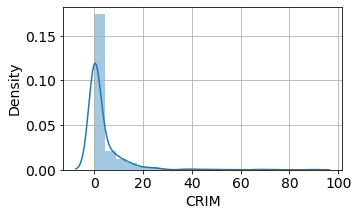

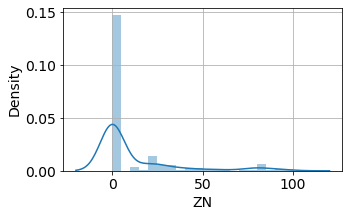

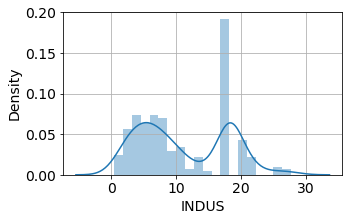

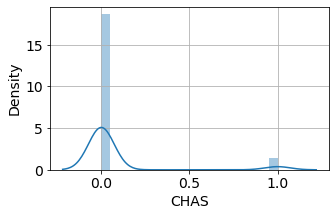

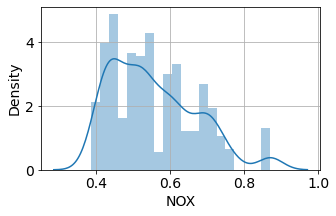

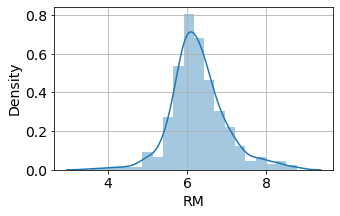

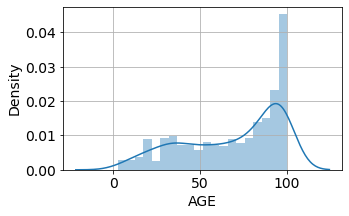

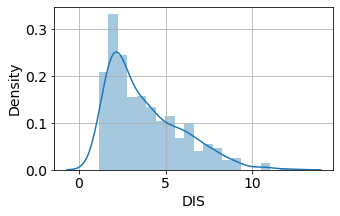

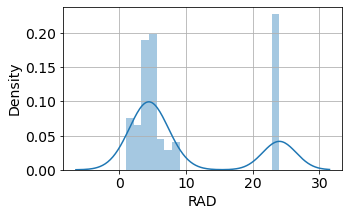

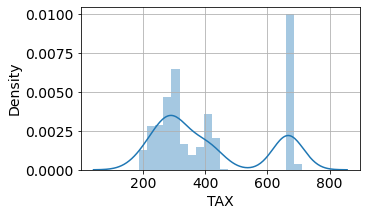

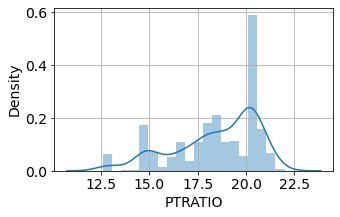

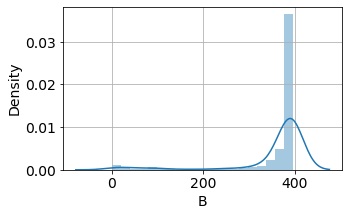

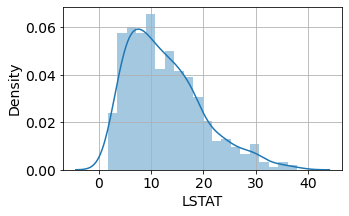

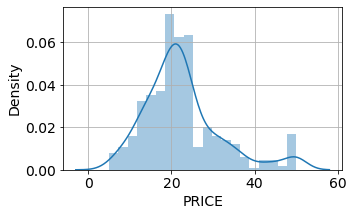

In [63]:
for i in features:
    plt.figure(figsize=[5, 3])
    sns.distplot(df[i], bins=20)
    plt.grid()

3. Оценка характера зависимости целевой переменной от каждого признака

TypeError: ignored

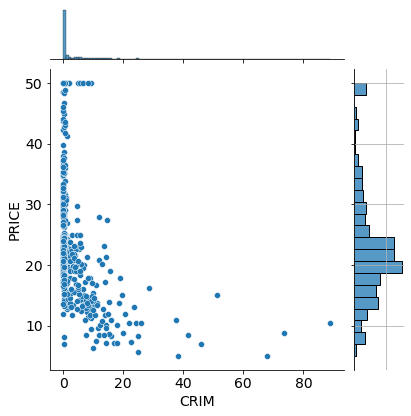

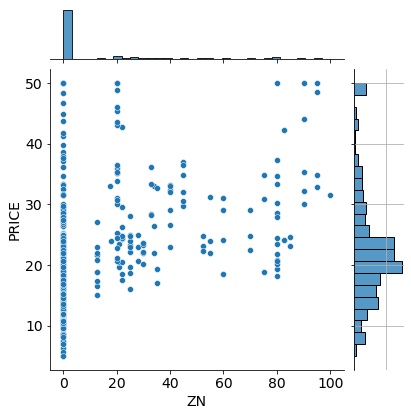

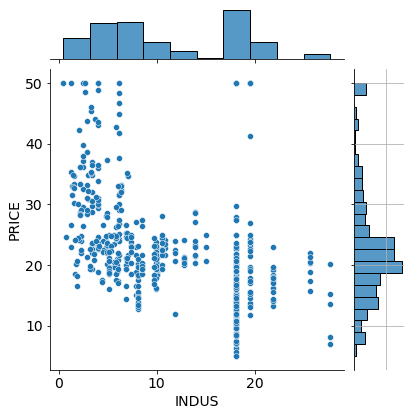

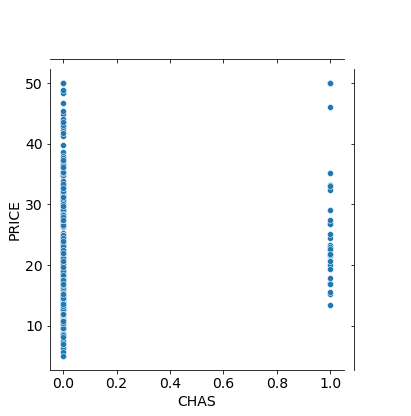

In [83]:
for i in features:
    sns.jointplot(x=i, y="PRICE", data=df)
    plt.grid()

По результатам расширенного анализа данных можно сделать следующие выводы:
Признак PRICE наилучшим образом коррелирует с признаком RM, распределение признака RM можно считать нормальным, согласно визуальной оценке, только признак RM соответствует линейной зависимости.

Соответственно, следует устранить выбросы данных и выровнять распределения данных.

**Работа с инструментами нормализации данных**

Примените трансформер sklearn.preprocessing.StandardScaler к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682065

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.638689926172821
  MAE: 3.162709871457406


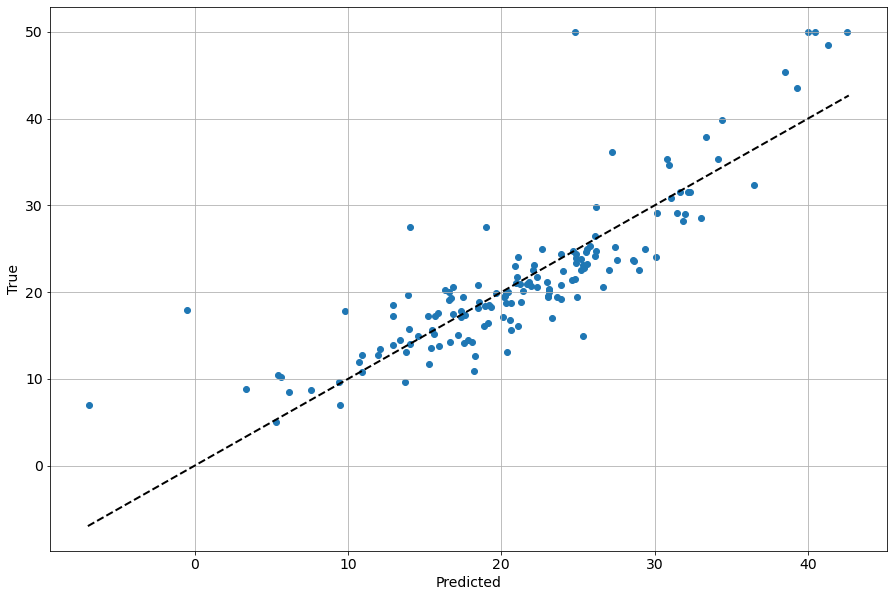

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)


Примените трансформер sklearn.preprocessing.MinMaxScaler к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;


----- Weights -----
CRIM | -11.874453326332448
ZN | 3.4018467913571957
INDUS | 1.3138357776880198
CHAS | 3.1198351162853952
NOX | -7.492691595119078
RM | 19.949248622000347
AGE | -1.0507030964564752
DIS | -15.24168408021582
RAD | 5.5827288159117545
TAX | -4.559970807607127
PTRATIO | -8.560440956236727
B | 4.677310480676527
LSTAT | -19.82738645674022
Bias: 26.028229324073685

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682047

----- Evaluation for test -----
  R2: 0.7112260057484927
  RMSE: 4.638689926172824
  MAE: 3.1627098714574067


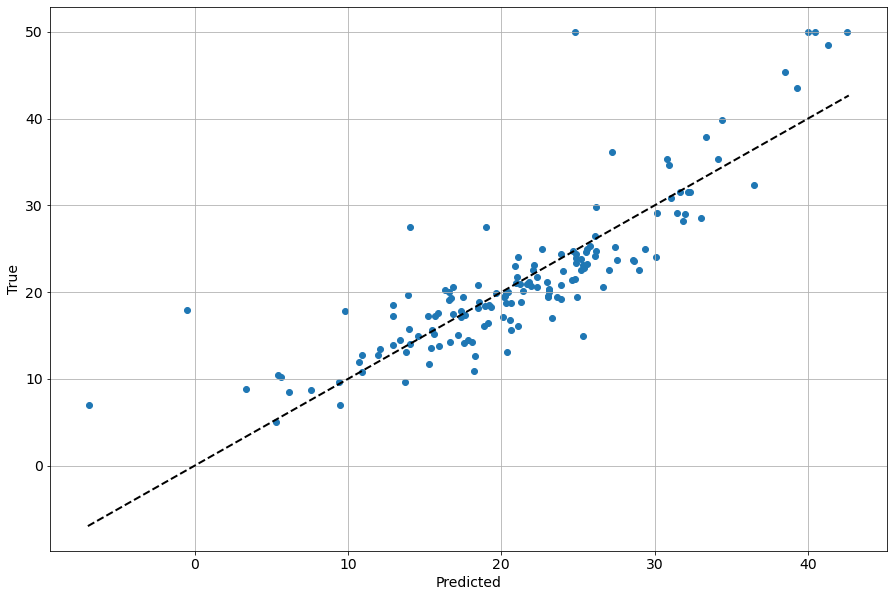

In [67]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

После применения инструментов нормализации данных можно сделать следующие выводы:
Оценки MSE, RMSE и R2 совпадают, визуально распределения совпадают, весовые коэффициенты отличаются. 

Далее необходимо уменьшить метрики MSE и RMSE, а также приблизить значение  R2 к единице для улучшения работы.

**Изучение работы инструментов выравнивания распределений**

Примените трансформер sklearn.preprocessing.PowerTransformer к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.13156466464394423
ZN | 0.19951252047411283
INDUS | -0.661968941043374
CHAS | 0.8070988287388107
NOX | -1.593975913739194
RM | 1.953238668377283
AGE | 0.14000510013869283
DIS | -3.2702370734918667
RAD | 0.3842721775169
TAX | 6.661338147750939e-15
PTRATIO | -1.6118671671696452
B | 0.5688864225523941
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454906
  RMSE: 4.391156466464553
  MAE: 3.1620670158148196


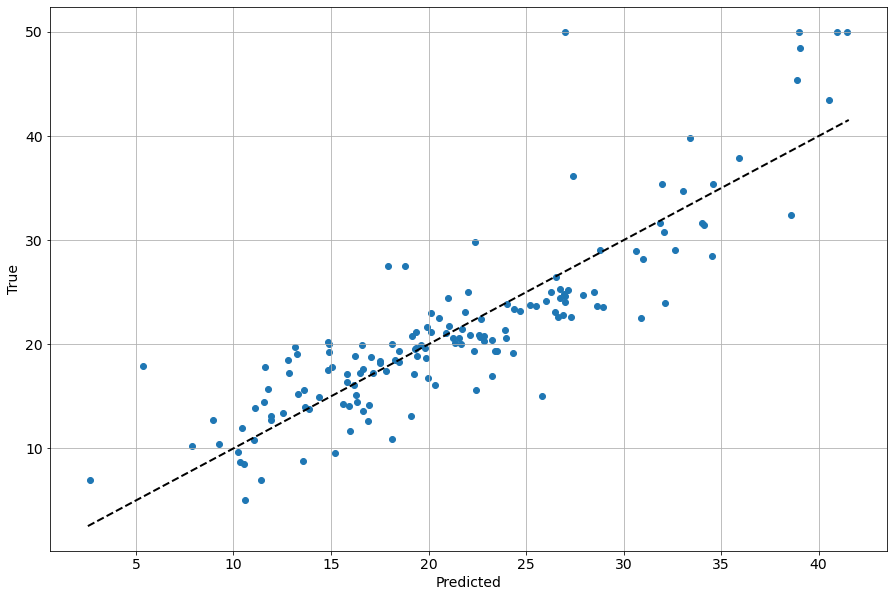

In [68]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
pt.fit(X_train)

# Стандартизация данных
X_train_scaled = pt.transform(X_train)
X_test_scaled = pt.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)



Примените трансформер sklearn.preprocessing.QuantileTransformer(output_distribution='normal') к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))



----- Weights -----
CRIM | -0.6436215551896776
ZN | 0.2136504931088371
INDUS | -0.17880257287476875
CHAS | 0.26018524120763875
NOX | -1.0316416211746446
RM | 1.4017566758007836
AGE | -0.02195341592461203
DIS | -3.3851448585615316
RAD | 0.1010514822287012
TAX | -1.157250252265722
PTRATIO | -1.3505805423381212
B | -0.10849526852504174
LSTAT | -5.5311442521125285
Bias: 24.968537558402915

----- Evaluation for train -----
  R2: 0.7554172540431211
  RMSE: 4.636590829916763
  MAE: 3.4594000699690453

----- Evaluation for test -----
  R2: 0.7464716005585341
  RMSE: 4.346399182858186
  MAE: 3.1830447298707427


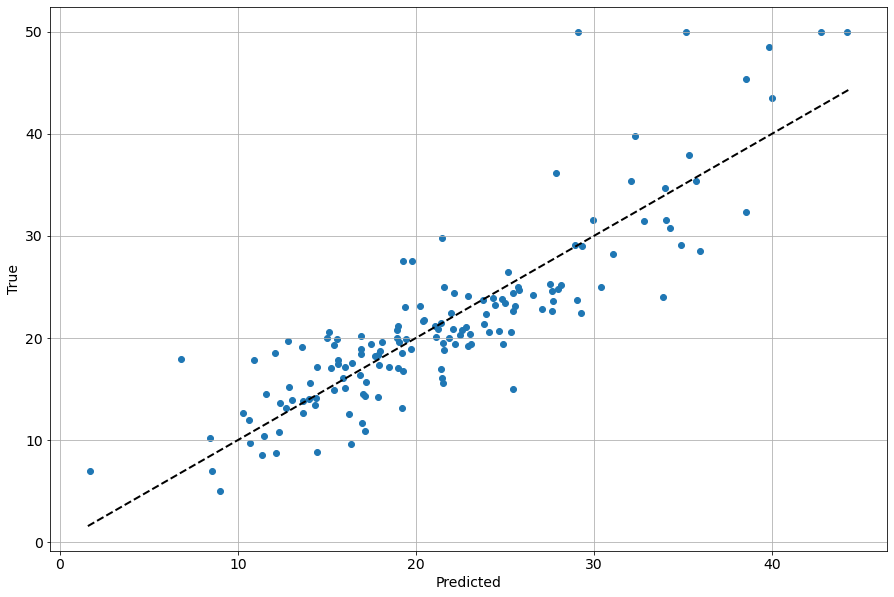

In [69]:
from sklearn.preprocessing import QuantileTransformer
pt=QuantileTransformer(output_distribution='normal')
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
pt.fit(X_train)

# Стандартизация данных
X_train_scaled = pt.transform(X_train)
X_test_scaled = pt.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

После применения выравнивания распределений можно сделать следующие выводы: показатели весов отличаются, несколько улучшились показатели R2, MSE и RMSE. 

Требуется дальнейшая корректировка данных.

**Исключите выбросы на уровне PRICE == 50 из данных, обучите модель и оцените показатели**


----- Weights -----
CRIM | -0.12381878117351394
ZN | 0.04038991169297008
INDUS | -0.04633642800193789
CHAS | -0.029973239830924307
NOX | -14.688063333672863
RM | 3.333246719403874
AGE | -0.021294868200934354
DIS | -1.3881850773173994
RAD | 0.23160877762484414
TAX | -0.012433320325953387
PTRATIO | -0.8576286263011887
B | 0.006898412474272638
LSTAT | -0.3753130106657583
Bias: 37.5599334261054

----- Evaluation for train -----
  R2: 0.7798306337503477
  RMSE: 3.778282589754244
  MAE: 2.7961504147140688

----- Evaluation for test -----
  R2: 0.7538446825846039
  RMSE: 3.5951405792699194
  MAE: 2.7775138468973313


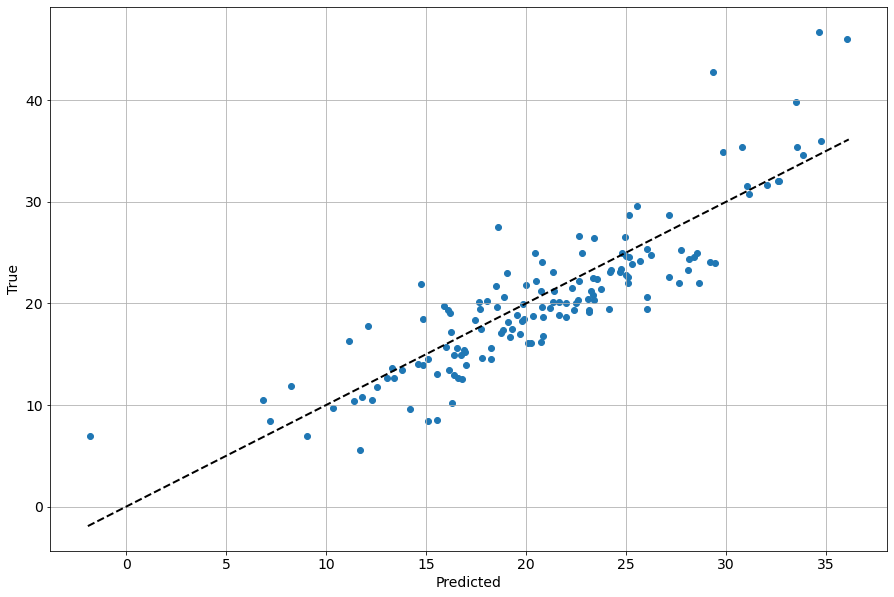

In [70]:
counter=df[df['PRICE']==50].index
df1=df.drop(counter,axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df1[feature_names]
# y - истинные значения (разметка)
y = df1['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')
y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

Результатом исклюения выбросов стало улучшения метрик MSE и MAE, незначительно выросла метрика R2. 

**Оцените работу модели при исключении каждого признака [13 экспериментов] (результаты представить в виде таблицы DataFrame с указание исключенного признака и показателей метрик);**

In [71]:
def evaluate_regressor1(reg, X, y):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)
    return r2_score_value, rmse_score, mae_score
   


In [72]:
new_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
y=df['PRICE']
data_frame=pd.DataFrame(columns=['R2_train','RMSE_train','MAE_train','R2_test','RMSE_test','MAE_test'])

for i in new_features:
    X=df.drop(columns=[i,'PRICE'])

    X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE)
    reg=LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    data_frame.loc[i,['R2_train','RMSE_train','MAE_train']] = evaluate_regressor1(reg, X_train, y_train)
    data_frame.loc[i,['R2_test','RMSE_test','MAE_test']] = evaluate_regressor1(reg, X_test, y_test)

data_frame
    

   

,R2_train,RMSE_train,MAE_train,R2_test,RMSE_test,MAE_test
CRIM,0.735429,4.82233,3.3952,0.715061,4.60778,3.13734
ZN,0.740394,4.77686,3.39217,0.697831,4.74505,3.24995
INDUS,0.743151,4.75144,3.3615,0.71241,4.62917,3.14422
CHAS,0.736665,4.81105,3.37897,0.708814,4.65802,3.20433
NOX,0.735551,4.82122,3.36302,0.690537,4.80198,3.23687
RM,0.693006,5.19458,3.72381,0.683052,4.85971,3.49986
AGE,0.74316,4.75135,3.36037,0.713868,4.61742,3.12911
DIS,0.718693,4.97251,3.49345,0.670199,4.95726,3.33199
RAD,0.736878,4.80911,3.36305,0.688301,4.8193,3.28564
TAX,0.740817,4.77298,3.36438,0.698385,4.7407,3.24129


**Примените трансформер sklearn.preprocessing.PolynomialFeatures для генерации признака LSTAT в квадрате, обучите модель на данных с новым признаком, оцените работу модели;**


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


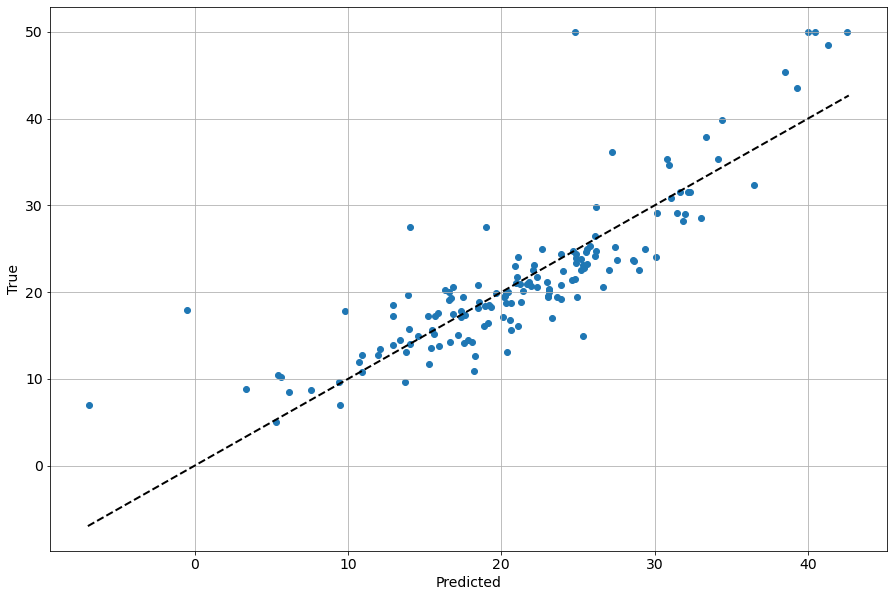

In [73]:
from sklearn.preprocessing import PolynomialFeatures

TRAIN_RATIO = 0.7
X = df[feature_names]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state=RANDOM_STATE)

pf = PolynomialFeatures(2)
reg = LinearRegression();

X_train_new=np.array(X_train['LSTAT']).reshape(-1,1)
X_test_new=np.array(X_test['LSTAT']).reshape(-1,1)

pf.fit(X_train_new)

X_train_new=np.concatenate((np.array(X_train.drop(columns=['LSTAT'])),X_train_new),axis=1)
X_test_new=np.concatenate((np.array(X_test.drop(columns=['LSTAT'])),X_test_new),axis=1)

reg.fit(X_train_new, y_train)
evaluate_regressor(reg, X_train_new, y_train, 'train')
evaluate_regressor(reg, X_test_new, y_test, 'test')
y_pred = reg.predict(X_test_new)
draw_predictions_plot(y_pred, y_test)

**Создайте базовую модель Ридж регрессии**


In [74]:
from sklearn.metrics import r2_score
def R2_metric (reg, X, y, mode):
    y_pred = rd.predict(X)
    r2= r2_score(y, y_pred)
    return r2


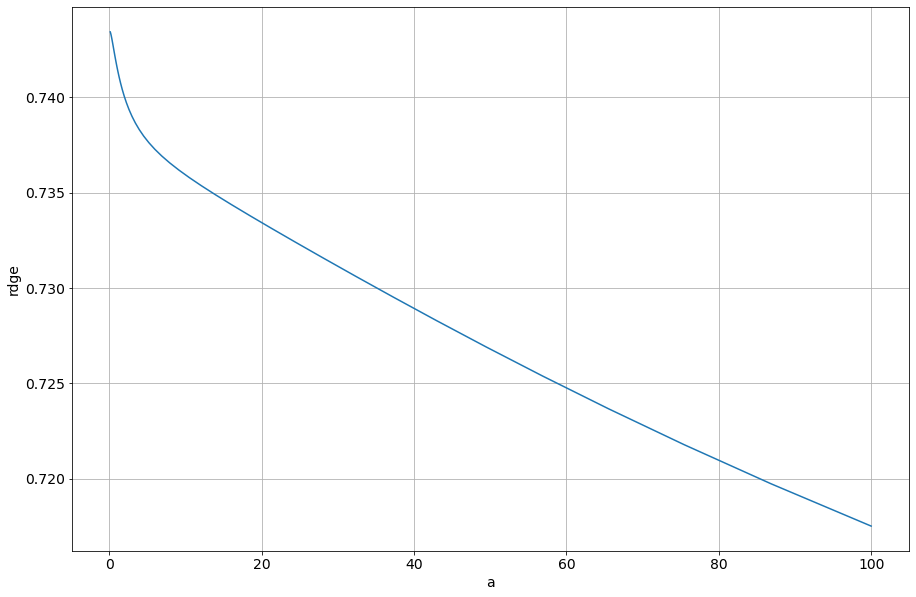

In [75]:
from sklearn.linear_model import Ridge

a=np.logspace(-1,2,50)
rdge=[]
for i in a:
    rd=Ridge(alpha=i)
    rd.fit(X_train, y_train)
    y_pred=rd.predict(X_test)
    rdge.append(R2_metric(reg,X_train,y_train,'train'))
plt.plot(a,rdge)
plt.xlabel('a')
plt.ylabel('rdge')
plt.grid()

Испытайте работу модели при использовании различных методов нормализации и выравнивания распределений;

Standart Scaler


----- Weights -----
CRIM | -1.0959333352863245
ZN | 0.7882002902172326
INDUS | 0.3141384584121459
CHAS | 0.8194327673352403
NOX | -1.7615911836191585
RM | 2.91992551807009
AGE | -0.30160551718902584
DIS | -2.902349023525914
RAD | 2.0127825519484306
TAX | -1.3761150026099584
PTRATIO | -2.0411130244314304
B | 1.0209642536988466
LSTAT | -3.8711605765922426
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.743482391414018
  RMSE: 4.748368933454408
  MAE: 3.3520641215891938

----- Evaluation for test -----
  R2: 0.7108071617209415
  RMSE: 4.6420527351841026
  MAE: 3.161026516515537


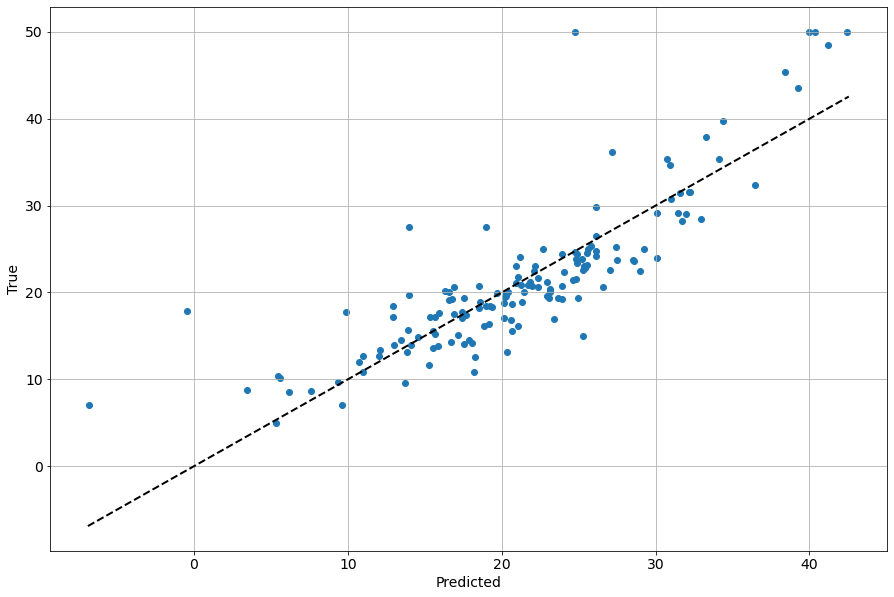

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = Ridge(alpha=1.0)

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

MinMaxScaler


----- Weights -----
CRIM | -7.466381704215992
ZN | 2.3800868391937913
INDUS | 0.1720825326667058
CHAS | 3.5408013485213683
NOX | -5.504378531624222
RM | 18.352254498060088
AGE | -0.9337916685959564
DIS | -11.519844288810992
RAD | 3.767856861592313
TAX | -3.3678661319400227
PTRATIO | -8.268731162131754
B | 4.477526607284848
LSTAT | -18.92289026133223
Bias: 25.402289976271483

----- Evaluation for train -----
  R2: 0.7387251833812362
  RMSE: 4.792196740950352
  MAE: 3.3491646276433173

----- Evaluation for test -----
  R2: 0.711020981158772
  RMSE: 4.640336329192624
  MAE: 3.1087318709305003


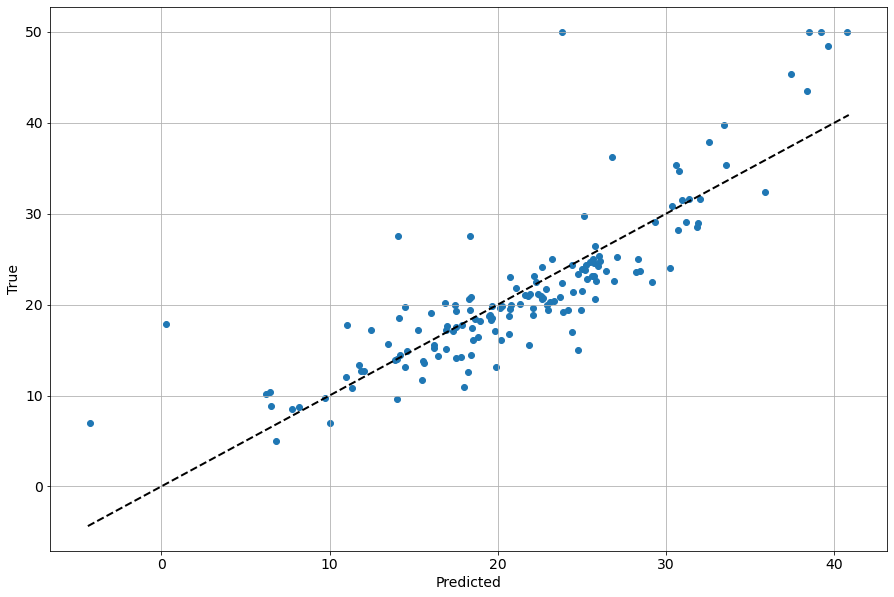

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg =Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

PowerTransformer

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.13484405121519177
ZN | 0.1970006461082394
INDUS | -0.6622164726629481
CHAS | 0.8098867261192222
NOX | -1.5436689470029348
RM | 1.9644355840165202
AGE | 0.13325991495923653
DIS | -3.2146019494800386
RAD | 0.37506502820960147
TAX | 0.0
PTRATIO | -1.6098372912808876
B | 0.5705528509342792
LSTAT | -5.780487656832394
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671538602313817
  RMSE: 4.523976964245666
  MAE: 3.342412393327308

----- Evaluation for test -----
  R2: 0.740795451130297
  RMSE: 4.394784786716414
  MAE: 3.157433953239507


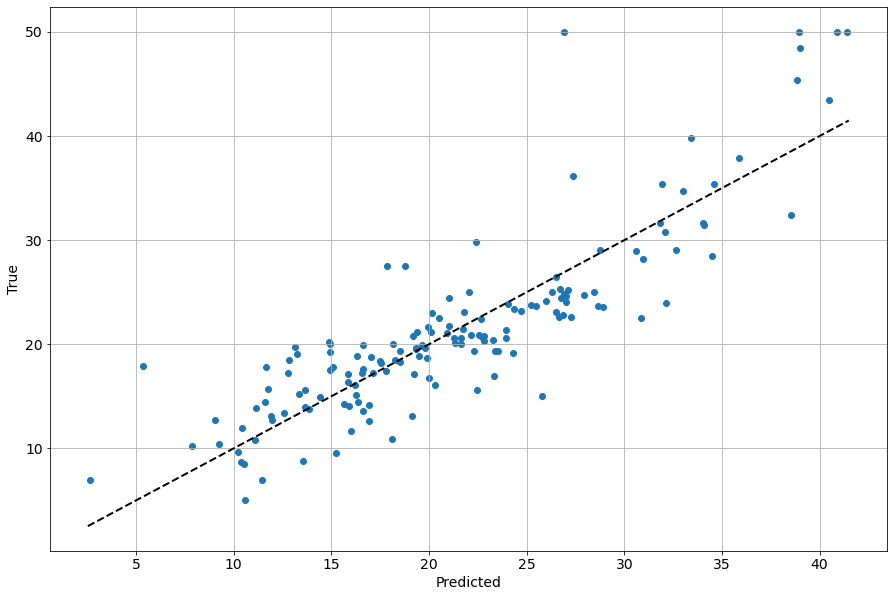

In [78]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
reg =Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
pt.fit(X_train)

# Стандартизация данных
X_train_scaled = pt.transform(X_train)
X_test_scaled = pt.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

QuantitleTransformer

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))



----- Weights -----
CRIM | -0.6345748611580135
ZN | 0.2121280386019434
INDUS | -0.18136341466531597
CHAS | 0.2623828908702728
NOX | -1.0242501187593551
RM | 1.4115574375153974
AGE | -0.020467502784717477
DIS | -3.3523848462210433
RAD | 0.09737976998366069
TAX | -1.1503159595664656
PTRATIO | -1.3504947696248601
B | -0.10792365515405362
LSTAT | -5.504220599808957
Bias: 24.974778160698214

----- Evaluation for train -----
  R2: 0.7554087270965972
  RMSE: 4.636671652497528
  MAE: 3.4579297420340493

----- Evaluation for test -----
  R2: 0.7464912158226579
  RMSE: 4.346231041109075
  MAE: 3.178893310311777


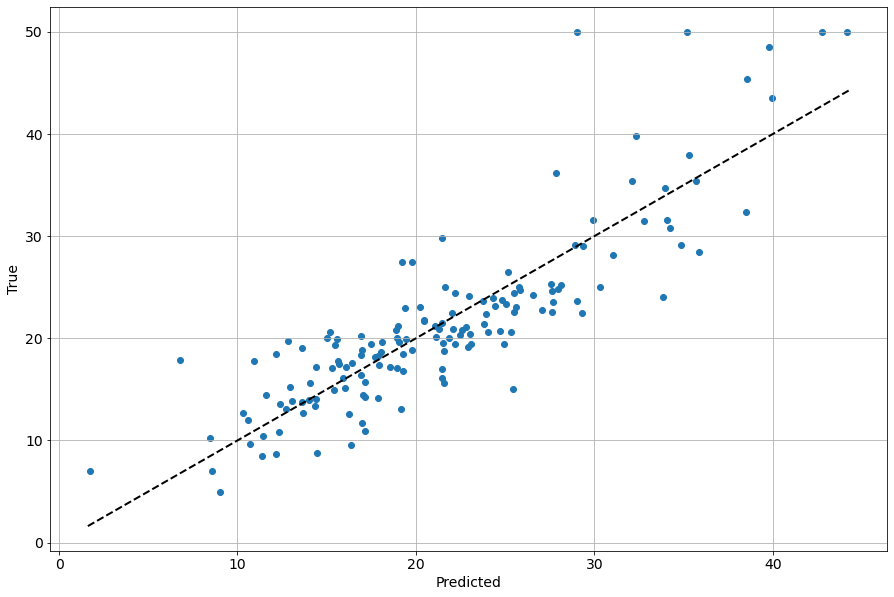

In [79]:
from sklearn.preprocessing import QuantileTransformer
pt=QuantileTransformer(output_distribution='normal')
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
pt.fit(X_train)

# Стандартизация данных
X_train_scaled = pt.transform(X_train)
X_test_scaled = pt.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

**Ответы на вопросы**

Какую задачу выполняет QuantileTransformer?

Трансформер QuantileTransformer является одим из методов нормализации и выравнивания распределения, уменьшает количество выбросов. Использует информацию о квантилях.

За что отвечает аргумент конструктора output_distribution класса QuantileTransformer?

output_distribution отвечает за Предельное распределение для преобразованных данных. Возможно равномерное и нормальное распределение.

В чем отличие Ридж регрессии от линейной регрессии?

Ридж грегрессия это один из методов понижения размерности. Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии. Линейная регрессия неэффективна в случае высокой коллинеарности, у ридж регрессии этот недостаток исключен.

Что такое регуляризация?

Регуляризация это метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Как сказывается станартизация данных на результатах обучения с использованием регуляризации?

При использовании StandartScaler практически не сказывается, при использовании MinMaxScaler наблюдается ухудшение

В каких случаях нужно применять StandardScaler, а в каких MinmaxScaler?

StandardScaler - когда хотим получить распределение со стандартным отклонением, равным 1.Т.е. масштабирование до единичной дисперсии. MinmaxScaler - трансформирует признаки в заданном диапазоне (исходный минимум и исходный максимум). После применения StandardScaler диапазон значений больше, чем после MinmaxScaler.

Как сказывается применение QuantileTransformer на результатах обучения с использованием регуляризации?

Наблюдается улучшение показателя R2 относительно использования StandartScaler и MinMaxScaler

Как влияет значение $\alpha$ на результаты обучения Ридж регрессии?

Согласно полученному графику, чем ближе к 0 значение $\alpha$, тем выше показатель R2

# Вопросы

- Какую задачу выполняет `QuantileTransformer`?
- За что отвечает аргумент конструктора `output_distribution` класса `QuantileTransformer`?
- В чем отличие Ридж регрессии от линейной регрессии?
- Что такое регуляризация?
- Как сказывается станартизация данных на результатах обучения с использованием регуляризации?
- В каких случаях нужно применять `StandardScaler`, а в каких `MinmaxScaler`?
- Как сказывается применение `QuantileTransformer` на результатах обучения с использованием регуляризации?
- Как влияет значение $\alpha$ на результаты обучения Ридж регрессии?

**Ответы:**

Какую задачу выполняет QuantileTransformer?

Трансформер QuantileTransformer является одим из методов нормализации и выравнивания распределения, уменьшает количество выбросов. Использует информацию о квантилях.

За что отвечает аргумент конструктора output_distribution класса QuantileTransformer?

output_distribution отвечает за Предельное распределение для преобразованных данных. Возможно равномерное и нормальное распределение.

В чем отличие Ридж регрессии от линейной регрессии?

Ридж грегрессия это один из методов понижения размерности. Применяется для борьбы с избыточностью данных, когда независимые переменные коррелируют друг с другом, вследствие чего проявляется неустойчивость оценок коэффициентов многомерной линейной регрессии. Линейная регрессия неэффективна в случае высокой коллинеарности, у ридж регрессии этот недостаток исключен.

Что такое регуляризация?

Регуляризация это метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

Как сказывается станартизация данных на результатах обучения с использованием регуляризации?

При использовании StandartScaler практически не сказывается, при использовании MinMaxScaler наблюдается ухудшение

В каких случаях нужно применять StandardScaler, а в каких MinmaxScaler?

StandardScaler - когда хотим получить распределение со стандартным отклонением, равным 1.Т.е. масштабирование до единичной дисперсии. MinmaxScaler - трансформирует признаки в заданном диапазоне (исходный минимум и исходный максимум). После применения StandardScaler диапазон значений больше, чем после MinmaxScaler.

Как сказывается применение QuantileTransformer на результатах обучения с использованием регуляризации?

Наблюдается улучшение показателя R2 относительно использования StandartScaler и MinMaxScaler

Как влияет значение $\alpha$ на результаты обучения Ридж регрессии?

Согласно полученному графику, чем ближе к 0 значение $\alpha$, тем выше показатель R2